## Training an image classifier from scratch on the CIFAR-10 dataset.

## Introduction

This example shows how to do image classification from scratch, starting from JPEG
image files on disk, without leveraging pre-trained weights or a pre-made Keras
Application model. 

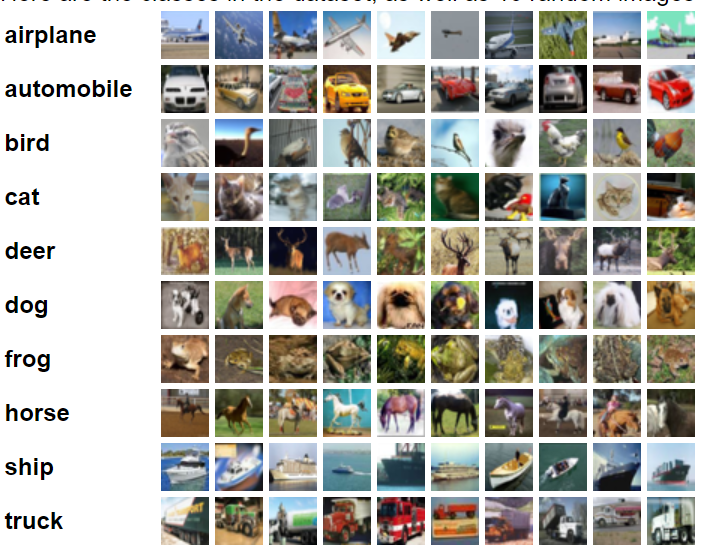

## Setup


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

## Load the data: CIFAR 10 dataset

### Raw data download

First, let's download the compressed archive of the raw data (162MB):


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.
Label	Description: 
*   0	airplane
*   1	automobile
*   2	bird
*   3	cat
*   4	deer
*   5	dog
*   6	frog
*   7	horse
*   8	ship
*   9	truck

Returns Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test).



In [3]:

name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

'truck'

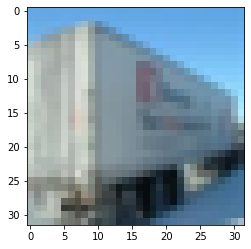

In [5]:
plt.imshow(x_train[15,:,:,:])
name[y_train[15][0]]


In [6]:
from tensorflow.keras.utils import to_categorical
yy_train = to_categorical(y_train,10)
yy_test = to_categorical(y_test,10)
yy_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## Using image data augmentation

When you don't have a large image dataset, it's a good practice to artificially
introduce sample diversity by applying random yet realistic transformations to the
training images, such as random horizontal flipping or small random rotations. This
helps expose the model to different aspects of the training data while slowing down
 overfitting.

 https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
 


## Generate the Train dataset with data augmentation

In [7]:
datagen = ImageDataGenerator(rescale=1./255., horizontal_flip=True)

In [8]:
train = datagen.flow(x_train,yy_train,batch_size=32,shuffle=True,seed=13)

In [9]:
train[0][0][0]

array([[[0.7725491 , 0.7960785 , 0.8078432 ],
        [0.7960785 , 0.8117648 , 0.8235295 ],
        [0.79215693, 0.8117648 , 0.8235295 ],
        ...,
        [0.2509804 , 0.18039216, 0.13333334],
        [0.20784315, 0.14509805, 0.10588236],
        [0.16470589, 0.10588236, 0.07450981]],

       [[0.77647066, 0.80392164, 0.8117648 ],
        [0.8000001 , 0.8196079 , 0.8313726 ],
        [0.8000001 , 0.8196079 , 0.82745105],
        ...,
        [0.14509805, 0.06666667, 0.03529412],
        [0.12156864, 0.0509804 , 0.03137255],
        [0.10196079, 0.03921569, 0.02352941]],

       [[0.79215693, 0.8235295 , 0.8235295 ],
        [0.8117648 , 0.83921576, 0.83921576],
        [0.81568635, 0.8352942 , 0.83921576],
        ...,
        [0.13725491, 0.0627451 , 0.03529412],
        [0.1254902 , 0.05882353, 0.03529412],
        [0.11764707, 0.05490196, 0.03137255]],

       ...,

       [[0.7411765 , 0.70980394, 0.6666667 ],
        [0.7725491 , 0.7411765 , 0.69803923],
        [0.7843138 , 0

### remember to rescale test data

In [10]:
x_test = x_test / 255.0

## Visualize the data

Here are the first images in the training dataset. 


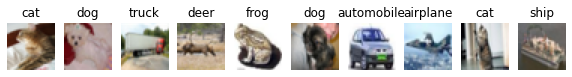

In [11]:
from numpy.core.fromnumeric import argmax
plt.figure(figsize=(10,10))
images=train[0][0]
labels=train[0][1]
for i in range(10):
  ax = plt.subplot(1,10,i+1)
  plt.imshow(images[i])
  nn = np.argmax(labels[i])
  plt.title(name[nn])
  plt.axis("off")

## Build a convolutional model

In [20]:
from tensorflow.keras.layers import Input, BatchNormalization, MaxPooling2D 
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

inp = Input((32,32,3))
x = Conv2D(64,(3,3),activation="relu")(inp)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2),strides=(2,2))(x)
x = Dropout(0.20)(x)

x = Conv2D(64,(3,3),activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2),strides=(2,2))(x)
x = Dropout(0.20)(x)


x = Conv2D(128,(3,3),activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2,2),strides=(2,2))(x)
x = Dropout(0.20)(x)


x = Flatten()(x)
x = Dense(256,activation="relu")(x)
x = Dropout(0.20)(x)

out = Dense(10,activation="softmax")(x)

model = Model(inp,out)
model.summary()





Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization_12 (Bat  (None, 30, 30, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 15, 15, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        3692

## Compile and Train the model
### Make at least 20 epochs, you should obtain >70% validation accuracy 

In [21]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
hist = model.fit(train, epochs=30, validation_data=(x_test,yy_test))

Epoch 1/30
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5190 - accuracy: 0.4596 - val_loss: 1.1708 - val_accuracy: 0.5835
Epoch 2/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1681 - accuracy: 0.5857 - val_loss: 1.2896 - val_accuracy: 0.5475
Epoch 3/30
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0305 - accuracy: 0.6357 - val_loss: 1.4667 - val_accuracy: 0.5403
Epoch 4/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9485 - accuracy: 0.6685 - val_loss: 1.0234 - val_accuracy: 0.6543
Epoch 5/30
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8889 - accuracy: 0.6910 - val_loss: 1.0665 - val_accuracy: 0.6470
Epoch 6/30
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8494 - accuracy: 0.7020 - val_loss: 0.8403 - val_accuracy: 0.7138
Epoch 7/30
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8160 - accuracy: 0.7156 - val_loss: 0.8978 - val_ac

### history of fitting

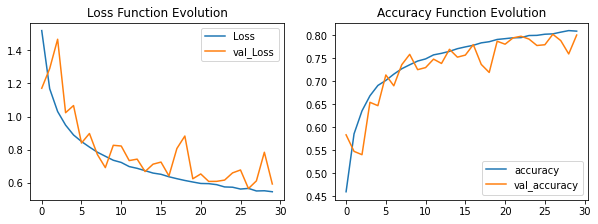

In [22]:
plt.figure(figsize=(10, 15))

plt.subplot(4, 2, 1)
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

## Calculate the prediction on test data
## Obtain the confusion matrix

> # $Results:$
This test is designed to determine how well the model generalizes. Comparing neural network outputs to corresponding targets in the testing instances of the data set is what we do here. The results show that the accuracy of this model is 0.8007 and the loss is 0.5930. This indicates how accurately the algorithm model evaluates the data. The loss measures the gap between the current output of the algorithm and its expected output, and a low value of the loss indicates the high accuracy of the model.

In [23]:
model.evaluate(x_test,yy_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5930 - accuracy: 0.8007


[0.5929663777351379, 0.8007000088691711]

In [24]:
pred = model.predict(x_test,verbose=1)

313/313 [==============================] - 1s 3ms/step


In [25]:
y_pred = np.argmax(pred,axis=1)
y_pred.shape

(10000,)

 > # $Confusion$ $Matrix:$
Using the confusion matrix, we can calculate the model's accuracy and error:
In the confusion matrix, the rows represent the targets (or real values) and the columns represent the corresponding outputs (or predictive values). The diagonal cells indicate correctly classified samples. The off-diagonal cells depict misclassified samples.
All but one of the testing instances are correctly classified here.

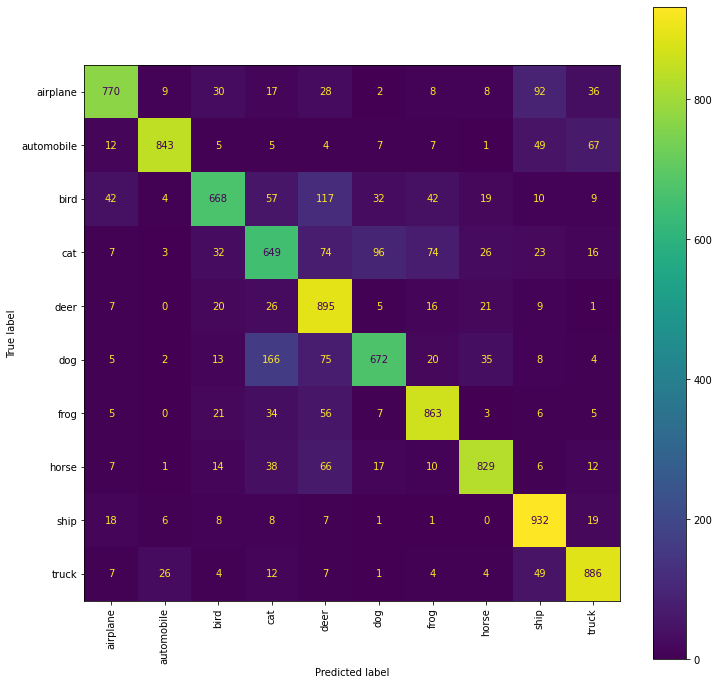

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
conf = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf,
                              display_labels=name)


fig, ax = plt.subplots(figsize=(12, 12))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='viridis')

plt.show()

## Run inference on new data

Note that data augmentation and dropout are inactive at inference time.


In [28]:
img = load_img("horse.jpg", target_size=(32,32))
A = keras.preprocessing.image.img_to_array(img)/255.
B = A.reshape(1,32,32,3)
mp = model.predict(B)
mp



array([[4.52557550e-04, 9.59460958e-05, 6.13735663e-03, 1.04787825e-02,
        2.13068724e-01, 1.49629116e-02, 2.69600842e-02, 7.24305511e-01,
        4.81218740e-04, 3.05678439e-03]], dtype=float32)

> # $Final$ $Comment:$
Due to the difficulty of this model and the use of many parameters to achieve high accuracy, achieving an accuracy of 80% is very good and the model's output can be deemed satisfactory.

What's in this picture? a horse



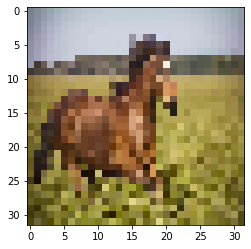

In [29]:
nn = np.argmax(mp)
print("What's in this picture? a",name[nn])
print()
plt.imshow(A)